## Assignment 4 - ROC Curves and AUC Values

### Stefenie Pickston
#### 1506427

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv


Load and check the data

In [2]:
# Load the dataset. 
df = pd.read_csv (os.path.join(dirname, filename))
# Check
print("Dataset loaded...")

# Check the dataset.
df.info()
df.head()

# Get X and Y variables. 
x_with_nulls = df.iloc[:, 1:10]
y = df.iloc[:, 10]

# Replace all NULL values
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
x = pd.DataFrame(my_imputer.fit_transform(x_with_nulls))
x.columns = x_with_nulls.columns

# Check Class is selected for Y. 
y

Dataset loaded...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

Using the SGD Classifier

In [3]:
# import libraries
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# create the classifier
sgd_clf = SGDClassifier(random_state = 1506427, shuffle = True)
# fit the data
sgd_clf.fit(x, y)
# generate the 5 fold cross validation score
sgd_clf_score = cross_val_predict(sgd_clf, x, y, cv = 5, method='decision_function')

print(sgd_clf_score)

[-260.29306597   12.66656143 -300.99929205  -61.62835741 -258.60473235
  381.84884519 -209.06791997 -339.64474586 -279.99029147 -307.00362931
 -377.91364113 -372.28586241 -135.16603926 -341.70551813  321.81783225
  -68.94858963 -312.63140803 -290.12029316  280.5488283  -230.46583878
  260.8516028   185.43524811 -342.45863522   25.97869523 -379.60197474
  -70.62868346 -335.14252289 -282.80418083 -372.28586241 -404.36420109
 -340.7703016  -349.77474755  229.70436074 -334.01696715 -332.32863353
 -372.28586241  251.27201929 -133.10526699  131.41269234  -76.25646217
  109.83259809   60.68066005  236.08937645 -126.35193253  185.42700832
 -373.41141816   -3.46777752 -402.11308961 -258.60473235   77.19567744
   82.62899704 -122.97114541   96.88878305  295.55349161  243.21514956
   74.37766819   68.56367015   -7.04302376  -25.60233383    1.77520286
  -81.70214146 -383.1648613   121.09235143 -170.43482584 -402.11308961
  215.06801619 -290.12029316  -31.23011255  409.04840235 -379.03919687
 -262.

Using the Random Forest Classifier

In [4]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

# create the classifier with 30 trees
rf_clf = RandomForestClassifier(random_state = 1506427, n_estimators = 30)
# fit the data
rf_clf.fit(x, y)
# generate the 5 fold cross validation score
rf_clf_score = cross_val_predict(rf_clf, x, y, cv = 5, method='predict_proba')[:,1]

print(rf_clf_score)

[0.         0.9        0.         0.63333333 0.         1.
 0.53333333 0.         0.06666667 0.         0.         0.
 0.23333333 0.         1.         0.63333333 0.         0.
 0.96666667 0.         0.9        1.         0.         0.66666667
 0.         0.53333333 0.         0.         0.         0.
 0.         0.         0.93333333 0.         0.         0.
 1.         0.13333333 0.96666667 0.86666667 0.9        0.53333333
 0.93333333 0.5        1.         0.         0.93333333 0.
 0.         0.9        0.7        0.36666667 0.83333333 0.9
 0.96666667 1.         0.93333333 0.63333333 0.76666667 0.56666667
 0.5        0.         0.9        0.36666667 0.         0.36666667
 0.         0.8        0.96666667 0.         0.         0.7
 0.2        0.93333333 0.83333333 0.         0.03333333 0.
 0.         0.         0.1        0.         0.         0.1
 1.         0.83333333 0.7        0.96666667 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

Using GaussianNB

In [5]:
# import libraries
from sklearn.naive_bayes import GaussianNB

# create classifier
gnb_clf = GaussianNB()
# fit the data
gnb_clf.fit(x, y)
# generate the 5 fold cross validation score
gnb_clf_score = cross_val_predict(gnb_clf, x, y, cv = 5, method='predict_proba')[:,1]

print(gnb_clf_score)

[7.63732039e-10 1.00000000e+00 3.02633450e-10 1.00000000e+00
 2.18979444e-09 1.00000000e+00 9.99864615e-01 1.59740789e-10
 9.74573912e-01 2.13056383e-10 5.58850909e-11 1.86011354e-11
 1.80272009e-02 4.96338044e-10 1.00000000e+00 1.00000000e+00
 7.85127928e-11 2.82752900e-10 1.00000000e+00 2.47569567e-09
 1.00000000e+00 1.00000000e+00 3.48842016e-11 9.99999987e-01
 4.28685769e-11 9.99999608e-01 1.23407004e-10 2.12067623e-10
 1.86011354e-11 1.12408117e-10 4.54763587e-11 6.69894012e-11
 1.00000000e+00 1.18053813e-10 8.31837541e-11 1.86011354e-11
 1.00000000e+00 1.02470483e-02 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999988e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 7.25297322e-11 1.00000000e+00 1.19034383e-11
 2.18979444e-09 1.00000000e+00 1.00000000e+00 1.80956007e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.99989148e-01
 1.00000000e+00 2.86743727e-11 1.00000000e+00 1.00000000e+00
 1.19034383e-11 1.000000

Plotting the ROC curves and calculating the AUC values, printing and adding the AUC values to the plot.

We found it was easier to do these steps together

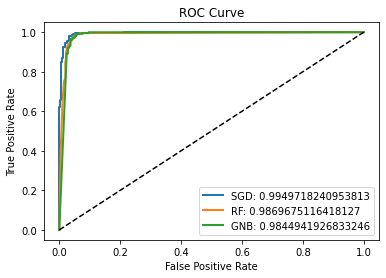

In [6]:
# import the libraries
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
    
# Create the ROC curves, AUC, and plot into the graph
fpr, tpr, threshold = roc_curve(y, sgd_clf_score)
sgd_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth = 2, label = "SGD: " + str(sgd_auc))

fpr, tpr, threshold = roc_curve(y, rf_clf_score)
rf_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth = 2, label = "RF: " + str(rf_auc))

fpr, tpr, threshold = roc_curve(y, gnb_clf_score)
gnb_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth = 2, label = "GNB: " + str(gnb_auc))

# Dashed diagonal
plt.plot([0, 1], [0, 1], 'k--')

# Axis Labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

plt.show()

Even though our top left corner of our ROC Curve can be viewed fairly easily, we will zoom in so we can analyse it with a higher accuracy and therefore be more confident. 

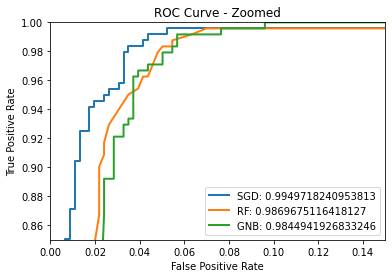

In [7]:
# Zoom into top left corner of ROC Curve
plt.xlim([0,0.15])
plt.ylim([0.85,1])

# Copy and paste the code from the original plot so we zoom in on the same plot. 
# Create the ROC curves, AUC, and plot into the graph
fpr, tpr, threshold = roc_curve(y, sgd_clf_score)
sgd_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth = 2, label = "SGD: " + str(sgd_auc))

fpr, tpr, threshold = roc_curve(y, rf_clf_score)
rf_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth = 2, label = "RF: " + str(rf_auc))

fpr, tpr, threshold = roc_curve(y, gnb_clf_score)
gnb_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth = 2, label = "GNB: " + str(gnb_auc))

# Dashed diagonal
plt.plot([0, 1], [0, 1], 'k--')

# Axis Labels
plt.title('ROC Curve - Zoomed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

plt.show()

Finding the accuracy of the cross validation

In [8]:
# import the libraries
from sklearn.model_selection import cross_val_score

# print out the scores
print("SGD:", cross_val_score(sgd_clf, x, y, cv=5).mean())
print("Rainforest:", cross_val_score(rf_clf, x, y, cv=5).mean())
print("GaussianNB:", cross_val_score(gnb_clf, x, y, cv=5).mean())

SGD: 0.9513977389516958
Rainforest: 0.9585611510791366
GaussianNB: 0.9585405960945529


##### Which of the three classifiers is the best one?

The closer the ROC curve is to the top left corner, the more accurate the classifier as it is using data to make predictions rather than making random/incorrect guesses. The SGD classifier ROC curve is the closest to the top left corner with the fewest class 0 and class 1 mispredictions.

It is also worth noting which classifier gets closest to 1 the quickest. In this case, it is also the SGD classifier. Therefore, according to the ROC Curve the SGD Classifier is the 'best one'. 


##### Is the classifier with the best AUC value also the most accurate classifier?

The Rainforest classifier has a higher cross validation score, however since the SGD classifier reaches 0.99 faster (and has a higher AUC value), as a doctor I would choose it over the Rainforest classifier.

One must be wary of ROC curves however. If the ROC curve goes straight into the top left corner then there could be a thresholding problem (ie. bad accuracy and good ROC curves). We can see, that because there are 'steps' to each of the lines on the ROC Curve, this is not an issue. 